<a href="https://colab.research.google.com/github/kanri3/machine_learning/blob/main/linear_regression_hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 単回帰

## 訓練データ生成

In [ ]:
n_sample = 100 # 標本数
var = .2 # 標準偏差

# 関数:y=2x+5のy座標を返す
def linear_func(x):
    return 2 * x + 5

# 関数:２乗誤差を無理やり作っちゃうのかよ
def add_noise(y_true, var): # y_true:データ配列
# loc:平均, scale:標準偏差, size:出力数
    return y_true + np.random.normal(scale=var, size=y_true.shape)

# 関数:グラフを描く
def plt_result(xs_train, ys_true, ys_train):
    # scatterは、〇を打つ。s=は直径。edgecolor=は色。
    plt.scatter(xs_train, ys_train, facecolor="none", edgecolor="y", s=50,  label="training data")
    # plotは線を引く。（点をつなぐ）
    plt.plot(xs_train, ys_true, label="$2 x + 5$")
    plt.legend() # 凡例

xs: (100,)
ys_true: (100,)
ys: (100,)


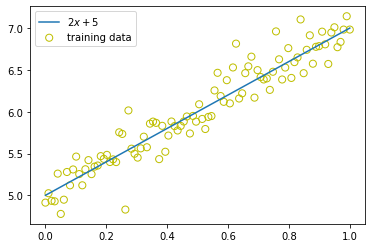

In [ ]:
#データの作成
xs = np.linspace(0, 1, n_sample)
ys_true = linear_func(xs)
ys = add_noise(ys_true, var)

print("xs: {}".format(xs.shape))
print("ys_true: {}".format(ys_true.shape))
print("ys: {}".format(ys.shape))

#結果の描画
plt_result(xs, ys_true, ys)

## 学習

In [ ]:
#numpy実装の回帰
def train(xs, ys):
  # ddofとは？
  # Means Delta Degrees of Freedom. The divisor used in calculations is N – ddof, where N represents the number of elements. By default ddof is zero.
  # つまり、分散の計算の際にN − ddofで割っていて、デフォルトではddof=0なので、母分散及び母集団の標準偏差として計算される。
  # ddof=1とすると不偏分散およびその平方根として計算される。
  # http://taustation.com/numpy-var-std-ddof/
    cov = np.cov(xs, ys, ddof=0)
    # coefficient 回帰係数（傾き）（cov[0,1]は共分散行列の0行1列目（0始まり））
    a = cov[0, 1] / cov[0, 0]
    # bはintercept y切片（回帰直線がx,yそれぞれの平均を通ることから）
    b = np.mean(ys) - a * np.mean(xs)
    return cov, a, b

cov, a, b = train(xs, ys)
print("共分散行列cov: {}".format(cov))
print("回帰係数（傾き）coef: {}".format(a))

共分散行列cov: [[0.08501684 0.17216781]
 [0.17216781 0.3822936 ]]
回帰係数（傾き）coef: 2.0251025352597427


## 予測

入力に対する値を$y(x) = a x + b$で予測する

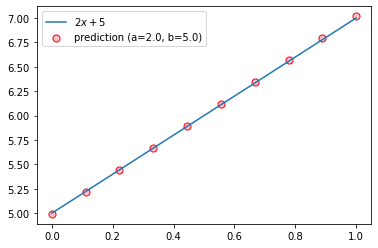

In [ ]:
xs_new = np.linspace(0, 1, int(n_sample/10))
ys_pred = a * xs_new + b

# plt.scatter(xs, ys, facecolor="pink", edgecolor="r", s=50, label="training data")
plt.plot(xs, ys_true, label="$2 x + 5$")
# 書式 a={:.2} :はお決まり，.2は有効桁数
# https://note.nkmk.me/python-format-zero-hex/
plt.scatter(xs_new, ys_pred, facecolor="pink", edgecolor="r", s=50, label="prediction (a={:.2}, b={:.2})".format(a, b))
# plt.plot(xs_new, ys_pred, label="prediction (a={:.2}, b={:.2})".format(a, b))
plt.legend()
plt.show()

# 重回帰分析

## 訓練データ生成 (3次元入力)

In [5]:
n_sample = 100
x_dim = 3
X=np.random.random((n_sample, x_dim))
X[0:5] #先頭5

array([[0.21768725, 0.62462805, 0.33832286],
       [0.85052813, 0.98789659, 0.08087442],
       [0.88209436, 0.44773177, 0.05129041],
       [0.76156397, 0.36362239, 0.93554345],
       [0.44022611, 0.46028037, 0.12009307]])

In [6]:
var = .2

def mul_linear_func(x):
    ww = [4., 3., -2., 5]
    return ww[0] + ww[1] * x[:, 0] + ww[2] * x[:, 1] + ww[3] * x[:, 2]

def add_noise(y_true, var):
    return y_true + np.random.normal(scale=var, size=y_true.shape)

def plt_result(xs_train, ys_train, x_label):
    plt.scatter(xs_train, ys_train, facecolor="none", edgecolor="b", s=50,  label="training data")
    # plt.plot(xs_train, ys_true)
    plt.xlabel(x_label)
    plt.ylabel("y")
    plt.legend()

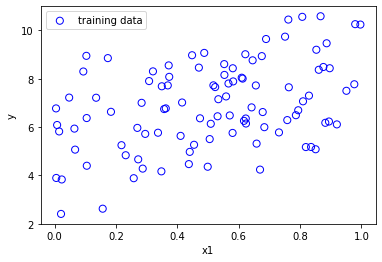

In [8]:
ys_true = mul_linear_func(X)
ys = add_noise(ys_true, var)
plt_result(X[:,0], ys, "x1")

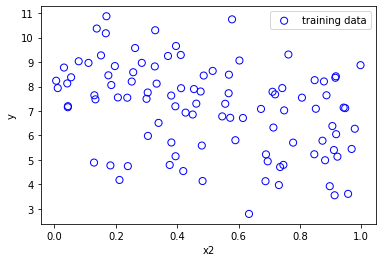

In [80]:
plt_result(X[:,1], ys, "x2")

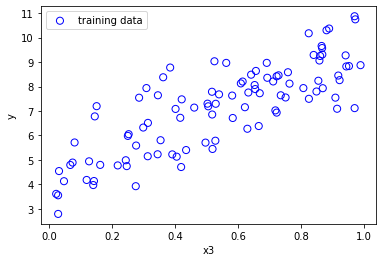

In [81]:
plt_result(X[:,2], ys, "x3")

## 学習

In [9]:
# outputに定数項を出すため1だけの列を追加
def add_one(x):
    # print("np.ones: {}".format([np.ones(len(x))[:, None], x]))
    j=np.ones(len(x))[:]
    print("shape: {}".format(j.shape))
    print("np.ones: {}".format(np.ones(len(x))[0:5]))
    print("type: {}".format(type(j)))
    k=np.ones(len(x))[:, None]
    print("shape: {}".format(k.shape))
    print("np.ones: {}".format(k[0:5]))
    print("type: {}".format(type(k)))
    t=np.concatenate([np.ones(len(x))[:, None], x], axis=1)
    print("np.ones: {}".format(t.shape))
    print("np.ones: {}".format(type(t)))
    # axis=1（列方向）指定しないと変な結合
    return np.concatenate([np.ones(len(x))[:, None], x], axis=1)

X_train = add_one(X)

shape: (100,)
np.ones: [1. 1. 1. 1. 1.]
type: <class 'numpy.ndarray'>
shape: (100, 1)
np.ones: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
type: <class 'numpy.ndarray'>
np.ones: (100, 4)
np.ones: <class 'numpy.ndarray'>


## 予測

## パラメータ推定結果

In [76]:
coef, rss, rank, s = np.linalg.lstsq(X_train, ys, rcond=None)
coef

array([ 3.93457502,  3.11112723, -1.96699947,  5.0138403 ])